# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train an MLP to classify images from the MNIST database.

### 1. Load MNIST Database

In [1]:
from keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

Using TensorFlow backend.


11493376/11490434 [==============================] - 6s 1us/step
The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


### 2. Visualize the First Six Training Images

ERROR! Session/line number was not unique in database. History logging moved to new session 12


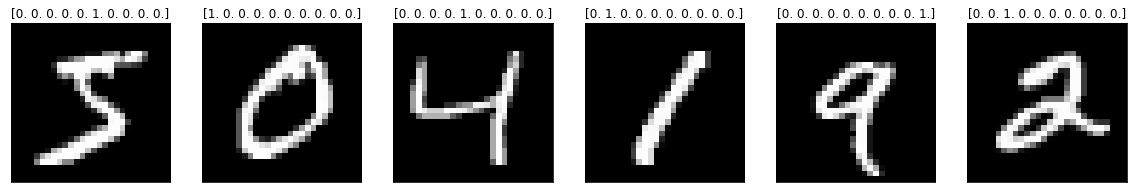

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np
import pandas as pd 

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

### 3. View an Image in More Detail

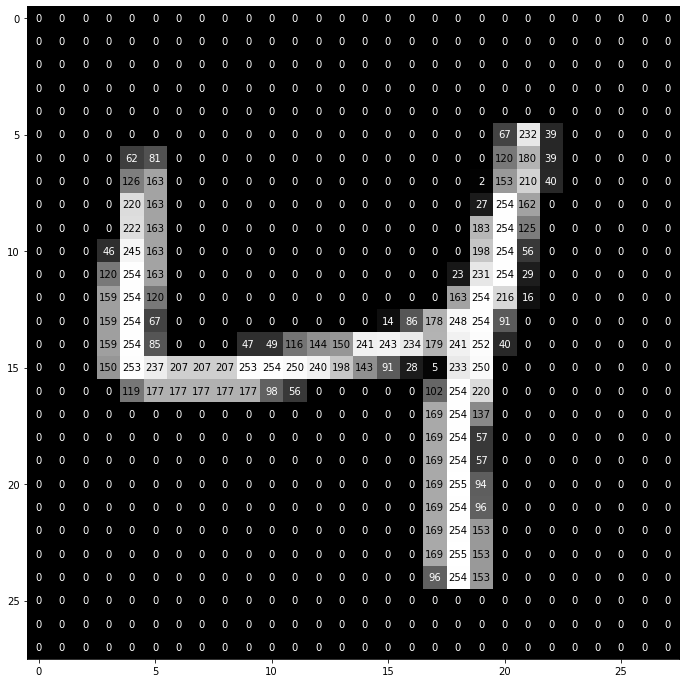

In [3]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[2], ax)

### 4. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [4]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255 

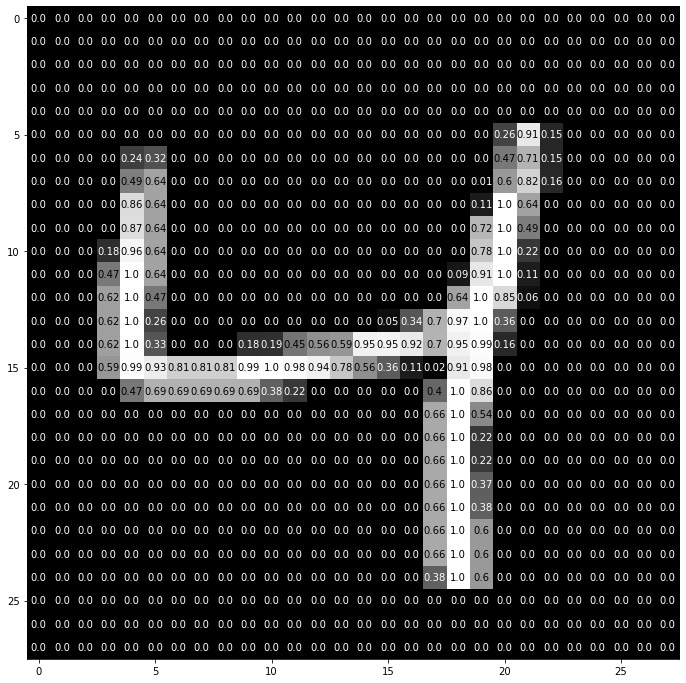

In [5]:
#Try to check visualize again after rescaling to 1
#My Code
fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[2], ax)

### 5. Encode Categorical Integer Labels Using a One-Hot Scheme

In [6]:
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### 6. Define the Model Architecture

In [7]:
print('y_hat=',y_train.shape)
print('X=',X_train.shape)
print('Y_truth=',y_test.shape)
print(X_train.shape[1:])

y_hat= (60000, 10)
X= (60000, 28, 28)
Y_truth= (10000, 10)
(28, 28)


In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
________________________________________________

### 7. Compile the Model

In [9]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

### 8. Calculate the Classification Accuracy on the Test Set (Before Training)

In [10]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 6.7800%


### 9. Train the Model

In [11]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 105us/step - loss: 0.2744 - accuracy: 0.9165 - val_loss: 0.1318 - val_accuracy: 0.9615

Epoch 00001: val_loss improved from inf to 0.13181, saving model to mnist.model.best.hdf5
Epoch 2/10
48000/48000 [==============================] - 5s 105us/step - loss: 0.1144 - accuracy: 0.9648 - val_loss: 0.0936 - val_accuracy: 0.9724

Epoch 00002: val_loss improved from 0.13181 to 0.09358, saving model to mnist.model.best.hdf5
Epoch 3/10
48000/48000 [==============================] - 5s 105us/step - loss: 0.0809 - accuracy: 0.9757 - val_loss: 0.1038 - val_accuracy: 0.9712

Epoch 00003: val_loss did not improve from 0.09358
Epoch 4/10
48000/48000 [==============================] - 5s 102us/step - loss: 0.0621 - accuracy: 0.9811 - val_loss: 0.0982 - val_accuracy: 0.9753

Epoch 00004: val_loss did not improve from 0.09358
Epoch 5/10
48000/48000 [==============================] - 5s 106us/s

### 10. Load the Model with the Best Classification Accuracy on the Validation Set

In [12]:
# load the weights that yielded the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

### 11. Calculate the Classification Accuracy on the Test Set

In [13]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 98.0500%


ERROR! Session/line number was not unique in database. History logging moved to new session 14


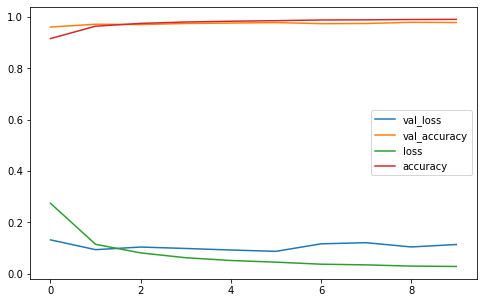

In [15]:
pd.DataFrame(hist.history).plot(figsize=(8,5))
plt.show()

ERROR! Session/line number was not unique in database. History logging moved to new session 15


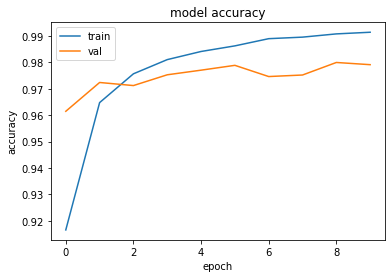

In [16]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

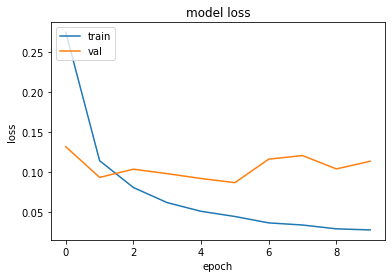

In [17]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Test 1: Changing the layers in the model
Also increasing number of epochs

In [18]:
# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [19]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])
# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 91us/step - loss: 0.3256 - accuracy: 0.9015 - val_loss: 0.1146 - val_accuracy: 0.9650

Epoch 00001: val_loss improved from inf to 0.11456, saving model to mnist.model.best.hdf5
Epoch 2/10
48000/48000 [==============================] - 4s 86us/step - loss: 0.1330 - accuracy: 0.9605 - val_loss: 0.1033 - val_accuracy: 0.9698

Epoch 00002: val_loss improved from 0.11456 to 0.10334, saving model to mnist.model.best.hdf5
Epoch 3/10
48000/48000 [==============================] - 4s 80us/step - loss: 0.0946 - accuracy: 0.9724 - val_loss: 0.0976 - val_accuracy: 0.9748

Epoch 00003: val_loss improved from 0.10334 to 0.09758, saving model to mnist.model.best.hdf5
Epoch 4/10
48000/48000 [==============================] - 4s 81us/step - loss: 0.0781 - accuracy: 0.9768 - val_loss: 0.0914 - val_accuracy: 0.9760

Epoch 00004: val_loss improved from 0.09758 to 0.09141, saving model to mnist.mo

In [20]:
# load the weights that yielded the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 98.0600%


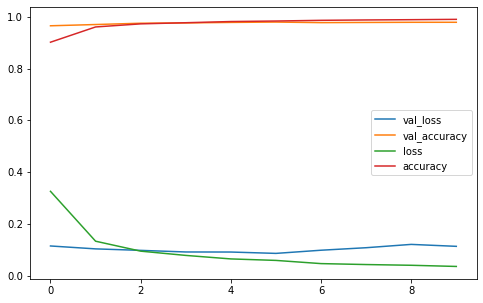

In [21]:
pd.DataFrame(hist.history).plot(figsize=(8,5))
plt.show()

### Test 2: Remove dropout

In [22]:
# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))

model.add(Dense(256, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])
# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=20,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 4s 84us/step - loss: 0.2702 - accuracy: 0.9156 - val_loss: 0.1046 - val_accuracy: 0.9677

Epoch 00001: val_loss improved from inf to 0.10455, saving model to mnist.model.best.hdf5
Epoch 2/20
48000/48000 [==============================] - 4s 83us/step - loss: 0.0982 - accuracy: 0.9701 - val_loss: 0.1202 - val_accuracy: 0.9643

Epoch 00002: val_loss did not improve from 0.10455
Epoch 3/20
48000/48000 [==============================] - 4s 83us/step - loss: 0.0634 - accuracy: 0.9800 - val_loss: 0.1265 - val_accuracy: 0.9658

Epoch 00003: val_loss did not improve from 0.10455
Epoch 4/20
48000/48000 [==============================] - 4s 76us/step - loss: 0.0457 - accuracy: 0.9857 - val_loss: 0.0833 - val_accuracy: 0.9768

Epoch 00004: val_loss improved from 0.10455 to 0.08332, saving model to mnist.model.best.hdf5
Epoch 5/20
48000/48000 [==============================] - 4s 77us/step -

In [23]:
# load the weights that yielded the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 97.6200%


In [24]:
# load the weights that yielded the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 97.6200%


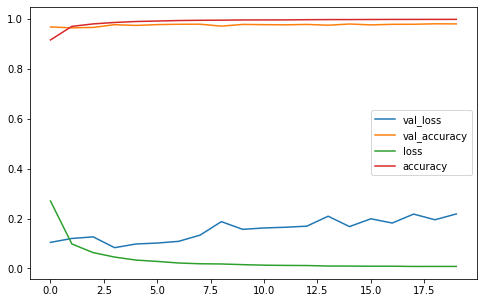

In [25]:
pd.DataFrame(hist.history).plot(figsize=(8,5))
plt.show()